In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

In [23]:
nsospec = pd.read_csv("NSOspec.csv")
Wvl = nsospec.Wavelength.values
Flux = nsospec.Flux.values

# Find Absorption Features false detection rate

In [7]:
from abfeature_functions import lowerSNR, findabsorptionfeatures

In [8]:
keep = np.where((Wvl > 5000) & (Wvl < 6000))[0]
wvl = np.array(list(Wvl[keep]))
trueflx = np.ones(len(keep))

In [17]:
linedepths = np.array([])
for i in range(1):
    flx = lowerSNR(trueflx, 500)
    wvbounds, minwvs, minflxs, maxflxs = findabsorptionfeatures(wvl, flx,
                                                            pix_range=25, minlinedepth=0.0, alpha=0.05, gamma=0.01)
    linedepths = np.hstack((linedepths, maxflxs-minflxs))

In [18]:
plt.hist(linedepths)
plt.show()

### Analyze results of 20 simulations of 500 SNR poisson noise spectra

In [2]:
l = pd.read_csv("aff_falsepos.csv")

In [3]:
l.columns

Index(['Unnamed: 0', 'LineDepths'], dtype='object')

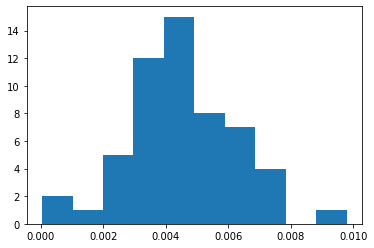

In [4]:
plt.hist(l.LineDepths.values)
plt.show()

In [5]:
len(l.LineDepths.values)

55

In [6]:
np.max(l.LineDepths.values)

0.009783999999999904

In [7]:
np.mean(l.LineDepths.values)

0.004607636363636353

In [8]:
np.std(l.LineDepths.values)

0.0017524429946753639

# Find Absorption Features true detection rate

In [8]:
keep = np.where((Wvl > 5000) & (Wvl < 6000) & (Flux > 0))[0]
wvl = np.array(list(Wvl[keep]))
flx = np.array(list(Flux[keep]))
bd = np.where(wvl[1:] > wvl[:-1])[0]
gd = np.hstack((np.where(wvl > wvl[bd+1])[0], np.array([i for i in range(int(bd+1), len(wvl))])))
wvl = wvl[gd]
flx = flx[gd]

<IPython.core.display.Javascript object>


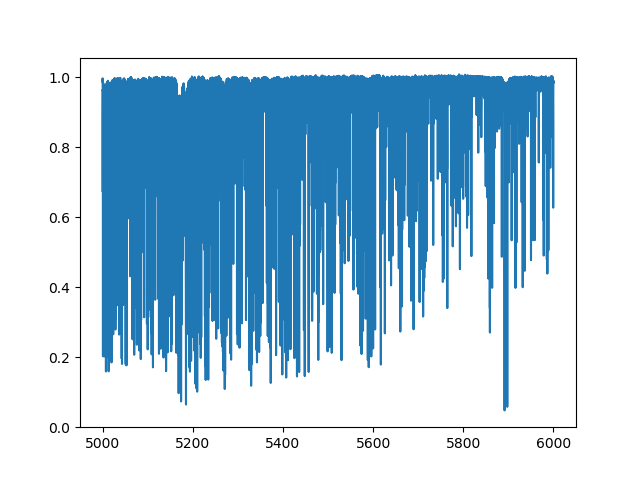

In [89]:
plt.plot(wvl, flx)
plt.show()

In [9]:
srt = np.argsort(wvl)
wvbounds, minwvs, minflxs, maxflxs = findabsorptionfeatures(wvl[srt], flx[srt],
                                                            pix_range=25, minlinedepth=0.015, alpha=0.05, gamma=0.01)

In [16]:
len(wvbounds)

1861

In [10]:
inftr_idx = np.unique(np.hstack(np.array([np.where((wvl >= bnd[0]) & (wvl <= bnd[1]))[0] for bnd in wvbounds])))
outftr_idx = np.setdiff1d(np.arange(len(wvl)), inftr_idx)

<IPython.core.display.Javascript object>


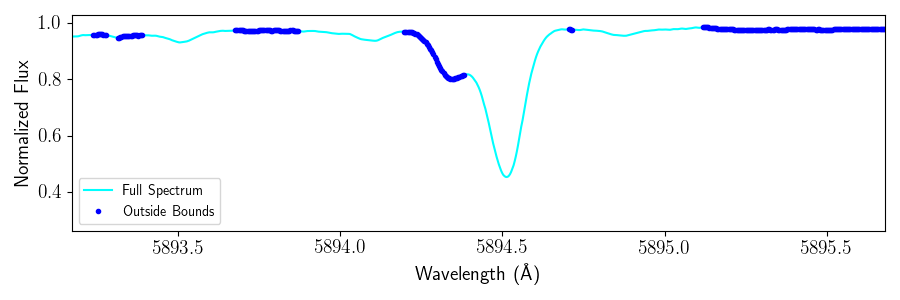

In [25]:
plt.figure(figsize=(9,3))
plt.rc('text', usetex=True)
plt.gcf().subplots_adjust(bottom=0.18)
plt.plot(wvl, flx, c='cyan', label='Full Spectrum')
plt.plot(wvl[outftr_idx], flx[outftr_idx], '.', c='blue', label='Outside Bounds')
#for i in range(len(wvbounds)):
#    if i%2 == 0:
#        plt.plot(wvbounds[i], (1.05, 1.05), c='red')
#    else:
#        plt.plot(wvbounds[i], (1.03, 1.03), c='red')
#plt.xlim(6053, 6061)
#plt.ylim(0.4, 1.1)
plt.xlabel(r"Wavelength (\AA)", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel(r"Normalized Flux", fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("aff_spec")
plt.show()

#### A look at some features that were missed

<IPython.core.display.Javascript object>


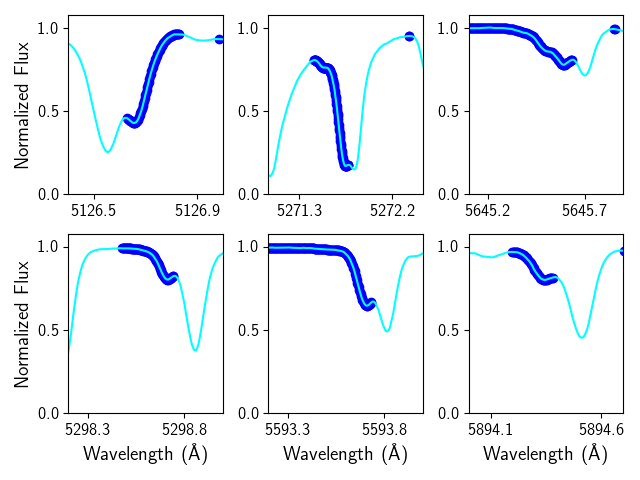

In [35]:
missed = [(5126.4, 5127), (5271, 5272.5), (5298.2, 5299), (5593.2, 5594), (5645.1, 5645.9), (5894, 5894.7)]
fig, ax = plt.subplots(2,3)
plt.rc('text', usetex=True)

ax[0,0].plot(wvl, flx, c='cyan')
ax[0,0].scatter(wvl[outftr_idx], flx[outftr_idx], c='blue')
ax[0,0].set_xticks([5126.5, 5126.9])
ax[0,0].set_xticklabels(["5126.5","5126.9"], fontsize=12)
ax[0,0].set_yticks([0, 0.5, 1.0])
ax[0,0].set_yticklabels(["0.0", "0.5", "1.0"], fontsize=12)
ax[0,0].set_xlim(missed[0])
ax[0,0].set_ylabel(r"Normalized Flux", fontsize=14)

ax[0,1].plot(wvl, flx, c='cyan')
ax[0,1].scatter(wvl[outftr_idx], flx[outftr_idx], c='blue')
ax[0,1].set_xticks([5271.3, 5272.2])
ax[0,1].set_xticklabels(["5271.3","5272.2"], fontsize=12)
ax[0,1].set_yticks([0, 0.5, 1.0])
ax[0,1].set_yticklabels(["0.0", "0.5", "1.0"], fontsize=12)
ax[0,1].set_xlim(missed[1])

ax[1,0].plot(wvl, flx, c='cyan')
ax[1,0].scatter(wvl[outftr_idx], flx[outftr_idx], c='blue')
ax[1,0].set_xticks([5298.3, 5298.8])
ax[1,0].set_xticklabels(["5298.3","5298.8"], fontsize=12)
ax[1,0].set_yticks([0, 0.5, 1.0])
ax[1,0].set_yticklabels(["0.0", "0.5", "1.0"], fontsize=12)
ax[1,0].set_xlim(missed[2])
ax[1,0].set_ylabel(r"Normalized Flux", fontsize=14)
ax[1,0].set_xlabel(r"Wavelength (\AA)", fontsize=14)

ax[1,1].plot(wvl, flx, c='cyan')
ax[1,1].scatter(wvl[outftr_idx], flx[outftr_idx], c='blue')
ax[1,1].set_xticks([5593.3, 5593.8])
ax[1,1].set_xticklabels(["5593.3","5593.8"], fontsize=12)
ax[1,1].set_yticks([0, 0.5, 1.0])
ax[1,1].set_yticklabels(["0.0", "0.5", "1.0"], fontsize=12)
ax[1,1].set_xlim(missed[3])
ax[1,1].set_xlabel(r"Wavelength (\AA)", fontsize=14)

ax[0,2].plot(wvl, flx, c='cyan')
ax[0,2].scatter(wvl[outftr_idx], flx[outftr_idx], c='blue')
ax[0,2].set_xticks([5645.2, 5645.7])
ax[0,2].set_xticklabels(["5645.2", "5645.7"], fontsize=12)
ax[0,2].set_yticks([0, 0.5, 1.0])
ax[0,2].set_yticklabels(["0.0", "0.5", "1.0"], fontsize=12)
ax[0,2].set_xlim(missed[4])

ax[1,2].plot(wvl, flx, c='cyan')
ax[1,2].scatter(wvl[outftr_idx], flx[outftr_idx], c='blue')
ax[1,2].set_xticks([5894.1, 5894.6])
ax[1,2].set_xticklabels(["5894.1", "5894.6"], fontsize=12)
ax[1,2].set_yticks([0, 0.5, 1.0])
ax[1,2].set_yticklabels(["0.0", "0.5", "1.0"], fontsize=12)
ax[1,2].set_xlim(missed[5])
ax[1,2].set_xlabel(r"Wavelength (\AA)", fontsize=14)

plt.tight_layout()
plt.savefig("aff_missed")
plt.show()

### What proportion of the spectrum is contained in absorption feature bounds?

In [98]:
len(inftr_idx)/len(wvl)

0.6426804742608435

### What proportion of the variance is accounted for within absorption feature bounds?

In [102]:
(np.sum((flx[inftr_idx] - np.mean(flx))**2)/len(flx))/(np.sum((flx - np.mean(flx))**2)/len(flx))

0.9056017787608468

### What about if we consider deviations from 1.0 instead of the mean flux?

In [107]:
(np.sum((flx[inftr_idx] - 1.0)**2)/len(flx))/(np.sum((flx - 1.0)**2)/len(flx))

0.9767711327996212

<IPython.core.display.Javascript object>


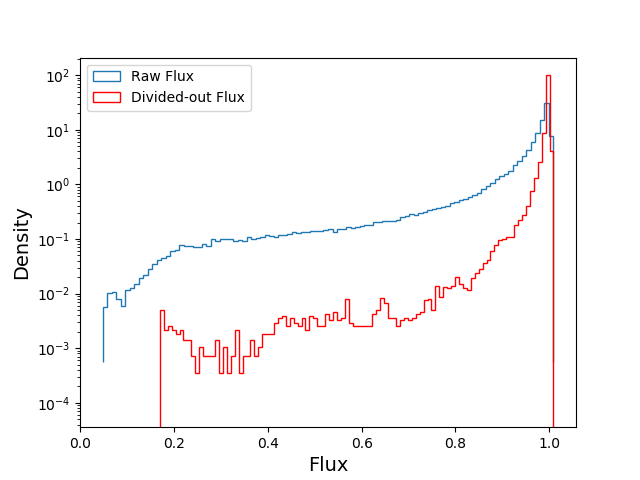

In [114]:
plt.hist(flx, bins = 100, density = True, histtype='step', log=True, label='Raw Flux')
dividedflx = np.array(list(flx))
dividedflx[inftr_idx] = 1.0
plt.hist(dividedflx, bins=100, density = True, histtype='step', color='r', log=True, label='Divided-out Flux')
plt.legend(loc='upper left')
plt.ylabel("Density", fontsize=14)
plt.xlabel("Flux", fontsize=14)
plt.savefig("AFF_fluxcomp")
plt.show()

In [116]:
np.std(flx)

0.14037094223619262

In [117]:
np.std(dividedflx)

0.023739795548148583